# Hexapod Kinematics Planning

In [241]:
""" Set-up code"""
# Python Packages
from IPython.display import SVG, display, Markdown # Display SVG files and figures
from pathlib import Path # Combine file paths


# Folders
folder_svg = Path("svg")


# Figure Numbering Function
def figure_caption(caption_input):
    # Create a counter attribute if it does not exist
    if not hasattr(figure_caption, "counter"):
        figure_caption.counter = 1  # Initialize the counter to 1
    
    # Format the caption string
    caption = f"Figure {figure_caption.counter}: {caption_input}"
    
    # Increment the counter for the next figure
    figure_caption.counter += 1
    
    return caption

## Forward Kinematics
Before we can figure out the joint angles, we need a way to check if our calculations are correct. We can accomplish this with forward kinematics, meaning to take in the joint angles, and calculate the position of the joints. 

In [242]:
""" Figure Display Code """
# Path to the SVG file
file_name = "plain_view.svg"

# Caption
caption = figure_caption("Hexapod leg kinematics plain view in side view.")



# Display the SVG file
svg_path = folder_svg / file_name
display(SVG(filename=svg_path))

# Adding a caption using Markdown
display(Markdown(f'<div style="text-align:center"><p style="text-align:center; font-style: italic;">{caption}</p></div>'))

<div style="text-align:center"><p style="text-align:center; font-style: italic;">Figure 1: Hexapod leg kinematics plain view in side view.</p></div>

### XY-Plane

In [243]:
""" Figure Display Code """
# Path to the SVG file
file_name = "FK-XY_Plane.svg"

# Caption
caption = figure_caption("Leg layout")



# Display the SVG file
svg_path = folder_svg / file_name
display(SVG(filename=svg_path))

# Adding a caption using Markdown
display(Markdown(f'<div style="text-align:center"><p style="text-align:center; font-style: italic;">{caption}</p></div>'))

<div style="text-align:center"><p style="text-align:center; font-style: italic;">Figure 2: Leg layout</p></div>

We can figure out the position of the joints as seen from the XY-plane or top view using polar coordinates. In the XY-plane, we can calculate the coordinates using sine and cosine:
$$
x = R \cos(\theta_{J1}) \tag{1}
$$
$$
y = R \sin(\theta_{J1}) \tag{2}
$$

Where R is the distance from J1 to the respective joint, excluding R0, which is the distance from the robot's origin. We also need to take into account the position of J1 in respect to the Robot's origin. This is a function of the leg angle J0, which is the angle between the legs, times the leg number:
$$
\theta_{leg} = \frac{2 \pi}{n_{leg}} \cdot k_{leg} \tag{3}
$$
* $\theta_{leg}$ - Leg angle.
* $n_{leg}$ - The number of legs on the robot.
* $ k_{leg} $ - The legs number or ID. 

With this, we can use equation 1 and 2 to calculate the position of the joints (and end-effector) on the XY-plane:
$$
P = (x, y)
$$
$$
P_{J1} = ( R_0 \cos(\theta_{leg}),  R_0 \sin(\theta_{leg})) \tag{4}
$$
$$
P_{J2} = P_{J1} + ( R_1 \cos(\theta_{J1}),  R_1 \sin(\theta_{J1})) \tag{5}
$$
$$
P_{J3} = P_{J2} + ( R_2 \cos(\theta_{J1}),  R_2 \sin(\theta_{J1})) \tag{6}
$$
$$
P_{EF} = P_{J3} + ( R_3 \cos(\theta_{J1}),  R_3 \sin(\theta_{J1})) \tag{7}
$$

### XZ-Plane
Now some of the sharper among you might have noticed that R2 and R2 are not a constant distance and vary depending the the joint angles. We will calculate these distances as well the the Z-coordinate of the joints and EF in the XZ-plane.

In [244]:
""" Figure Display Code """
# Path to the SVG file
file_name = "FK-XZ_Plane.svg"

# Caption
caption = figure_caption("Leg layout")



# Display the SVG file
svg_path = folder_svg / file_name
display(SVG(filename=svg_path))

# Adding a caption using Markdown
display(Markdown(f'<div style="text-align:center"><p style="text-align:center; font-style: italic;">{caption}</p></div>'))

<div style="text-align:center"><p style="text-align:center; font-style: italic;">Figure 3: Leg layout</p></div>

From this we can calculate the resultant vector sizes:
$$
R_1 = L1 \tag{8}
$$
$$
R_2 = R1 +  L2 \cos(\theta_{J2}) \tag{9}
$$
$$
R_3 = R2 +  L3 \cos(\theta_{J3}) \tag{10}
$$

For the height or z-coordinate of each leg, we simply do the same but with sine:
$$
y_{J1} = y_{robot} \tag{11}
$$
$$
y_{J2} = y_{J1} \tag{12}
$$
$$
y_{J3} = y_{J2} +  L2 \sin(\theta_{J2}) \tag{13}
$$
$$
y_{EF} = y_{J3} +  L3 \sin(\theta_{J3}) \tag{14}
$$

### Python Implementation

In [245]:
""" Set-up """
# Packages
import numpy as np
import os


# Default values
origin_robot = np.array([ 0, 0, 0 ]) #(x,y,z)[mm]
links = np.array([ 0, 100, 100, 100 ]) #[mm]
angles_default = np.array([ 0, 0, 0, -np.pi/2 ]) #[rad]


# File path
file_path = 'robot_config3.npz'

# Check if file exists
if os.path.exists(file_path):
    # Load the data from the file
    loaded_data = np.load(file_path)
    origin_robot = loaded_data['origin_robot']
    links = loaded_data['links']
    angles_default = loaded_data['default_angles']
    print("Loaded configuration from file.")
else:
    # Save the new data to the file
    np.savez(file_path, origin_robot=origin_robot, links=links, default_angles=angles_default)
    print("File not found. Generated and saved new data.")
angles = angles_default



""" Forward Kinematics """
# Calculate position of J1
P_J1 = origin_robot + np.array([ links[0]*np.cos(angles[0]), links[0]*np.sin(angles[0]), origin_robot[1] ]) #(x,y,z)[mm] Eq:4 and Eq:11

# Calculate resultant Rx vectors
R1 = links[1] #[mm] Eq:8
R2 = links[2] * np.cos(angles[2]) #[mm] Eq:9
R3 = links[3] * np.cos(angles[3]) #[mm] Eq:10

# Calculate joint positions
P_J2 = P_J1 + np.array([ R1, P_J1[1], P_J1[2] ]) #(x,y,z)[mm] Eq:5 and Eq:12
P_J3 = P_J2 + np.array([ R2*np.cos(angles[1]), R2*np.sin(angles[1]), P_J2[1] + links[2]*np.sin(angles[2]) ]) #(x,y,z)[mm] Eq:6 and Eq:13
P_EF = P_J3 + np.array([ R3*np.cos(angles[1]), R3*np.sin(angles[1]), P_J3[1] + links[3]*np.sin(angles[3]) ]) #(x,y,z)[mm] Eq:6 and Eq:13

# Print results
print("J1 pos: ", P_J1)
print("J2 pos:", P_J2)
print("J3 pos:", P_J3)
print("EF pos:", P_EF)

Loaded configuration from file.
J1 pos:  [0. 0. 0.]
J2 pos: [100.   0.   0.]
J3 pos: [200.   0.   0.]
EF pos: [ 200.    0. -100.]


### Plotting the Results

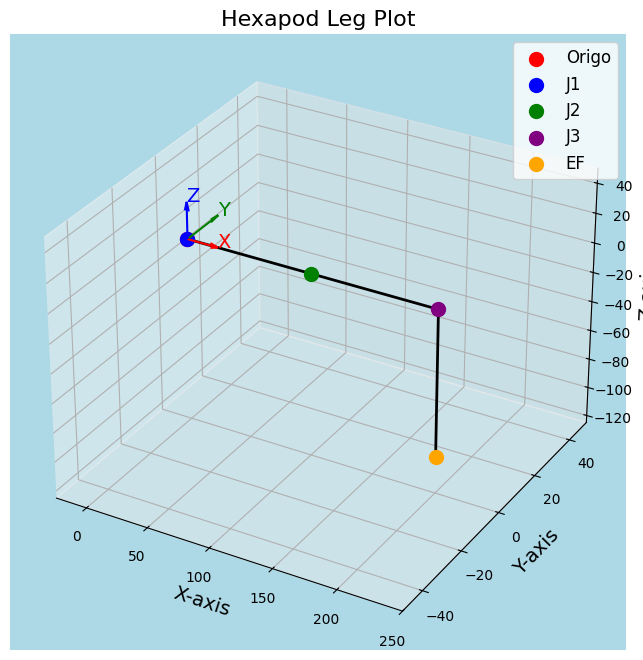

In [246]:
# Python Packages
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Combine all points into arrays for plotting
x = [0, P_J1[0], P_J2[0], P_J3[0], P_EF[0]]
y = [0, P_J1[1], P_J2[1], P_J3[1], P_EF[1]]
z = [0, P_J1[2], P_J2[2], P_J3[2], P_EF[2]]

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', facecolor='lightblue')

# Plot the lines
ax.plot(x, y, z, color='black', linewidth=2, linestyle='-', marker='o', markersize=6)

# Plot individual points with different styles
ax.scatter([0], [0], [0], color='red', s=100, label='Origo')
ax.scatter([P_J1[0]], [P_J1[1]], [P_J1[2]], color='blue', s=100, label='J1')
ax.scatter([P_J2[0]], [P_J2[1]], [P_J2[2]], color='green', s=100, label='J2')
ax.scatter([P_J3[0]], [P_J3[1]], [P_J3[2]], color='purple', s=100, label='J3')
ax.scatter([P_EF[0]], [P_EF[1]], [P_EF[2]], color='orange', s=100, label='EF')


# Set labels
ax.set_xlabel('X-axis', fontsize=14)
ax.set_ylabel('Y-axis', fontsize=14)
ax.set_zlabel('Z-axis', fontsize=14)
ax.set_title('Hexapod Leg Plot', fontsize=16)

# Add grid
ax.grid(True)

# Add legend
ax.legend(loc='best', fontsize=12)

# Add arrows for x, y, and z axes
arrow_length = 25
ax.quiver(0, 0, 0, arrow_length, 0, 0, color='red', arrow_length_ratio=0.25)
ax.quiver(0, 0, 0, 0, arrow_length*0.6, 0, color='green', arrow_length_ratio=0.25)
ax.quiver(0, 0, 0, 0, 0, arrow_length, color='blue', arrow_length_ratio=0.25)

# Label the arrows
ax.text(arrow_length, 0, 0, 'X', color='red', fontsize=14)
ax.text(0, arrow_length*0.6, 0, 'Y', color='green', fontsize=14)
ax.text(0, 0, arrow_length, 'Z', color='blue', fontsize=14)

# Set limits for x, y, and z axes
ax.set_xlim([-25, 250])
ax.set_ylim([-50, 50])
ax.set_zlim([-125, 50])


# Show plot
plt.show()



## Inverse Kinematics
Now that we have an reasonable way of displaying our robots leg, we can work out the inverse kinematics, or the angles needed to achieve the joint positions. 

## Joint Angle J3

In [247]:
""" Figure Display Code """
# Path to the SVG file
file_name = "kinematics_J3.svg"

# Caption
caption = figure_caption("Leg layout")



# Display the SVG file
svg_path = folder_svg / file_name
display(SVG(filename=svg_path))

# Adding a caption using Markdown
display(Markdown(f'<div style="text-align:center"><p style="text-align:center; font-style: italic;">{caption}</p></div>'))


<div style="text-align:center"><p style="text-align:center; font-style: italic;">Figure 4: Leg layout</p></div>

By using Pythagoras theorem, we can calculate the lenght of L:
$$ a^2 + b^2 = c^2 $$
$$ L = \sqrt{A^2 + B^2} $$

We can then solve the the angle of joint J3 ($\theta_{J3}$) with the law of cosine:
$$ \theta = \arccos(\frac{A^2 + B^2 - C^2}{2 A B}) $$
$$ \theta_{J3} = \arccos(\frac{L2^2 + L3^2 - L^2}{2 L2 L3}) $$

## Joint Angle J2

In [248]:
""" Figure Display Code """
# Path to the SVG file
file_name = "kinematics_J3.svg"

# Caption
caption = figure_caption("Leg layout")



# Display the SVG file
svg_path = folder_svg / file_name
display(SVG(filename=svg_path))

# Adding a caption using Markdown
display(Markdown(f'<div style="text-align:center"><p style="text-align:center; font-style: italic;">{caption}</p></div>'))

<div style="text-align:center"><p style="text-align:center; font-style: italic;">Figure 5: Leg layout</p></div>

We can calculate angle of joint J2 ( $\theta_{J2}$):
$$ \theta_{J2} = \theta_{B} + (-\theta_{A}) $$

We can again calculate angle B using the law of cosine:
$$ \theta_{B} = \arccos(\frac{L^2 + L2^2 - L3^2}{2 L \cdot L2}) $$

While the angle A can be found using tangent:
$$ \theta_{A} = \arctan(\frac{y}{x}) $$

We then calculate angle of joint J2 ( $\theta_{J2}$):
$$ \theta_{J2} = \theta_{B} + (-\theta_{A}) $$

## Joint Angle J2

Joint Angle $\theta_{J1}$ is found using inverse-tangence: 
$$
\theta_{J1} = \arctan(\frac{y}{x})
$$

### Python Implementation